In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

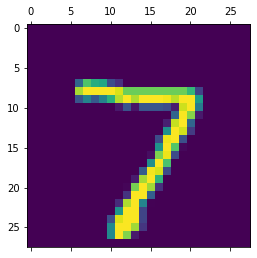

In [5]:
plt.matshow(x_test[0])

In [6]:
y_test[0]

7

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
#Scaling
x_train = x_train/255
x_test = x_test/255

In [9]:
#Flatten
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
#Model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.021

In [12]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9789


[0.08097133785486221, 0.9789000153541565]

In [13]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

In [14]:
conf_m = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

Text(69.0, 0.5, 'Actual Values')

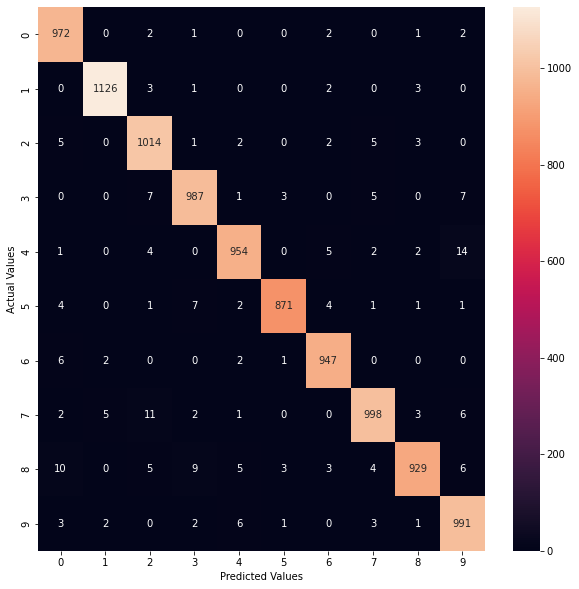

In [15]:
import seaborn as sb
plt.figure(figsize=(10, 10))
sb.heatmap(conf_m, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [16]:
model_json = model.to_json()
with open('digits.json', 'w') as json_file:
    json_file.write(model_json)

In [17]:
model.save('digits.h5')